### Step1: 导入必要的库

In [6]:
import pandas as pd #数据分析
import numpy as np #科学计算
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import os
os.chdir('D:\\Python\\Git_test\\Data_Analysis')

In [15]:
pd.set_option('display.max_columns',500)

## 一、数据读取

In [28]:
data_train = pd.read_csv("./input/visilization.csv")

In [29]:
data_train.head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,date,rating,Initial,Name_length,Title,Family_Size,Name_scaled,Title2,Title_train,W_Master,Age_cut1,Age_band,CategoricalAge,FareCut,Fare_scale,Sex_bool,Has_Cabin,IsAlone,Embarkedch,Title2ch
0,22.0,0,7.2500,0,3,0,1,0,03/23/2009,5,Mr,23,Mr,2,-0.434672,Mr,1,1,2,0,"(16.136, 32.102]",0,7.25,0,0,0,1,2
1,38.0,1,71.2833,0,1,1,1,1,03/26/2015,3,Mrs,51,Mrs,2,2.511806,Mrs,3,1,3,0,"(32.102, 48.068]",3,71.28,1,1,0,2,3
2,26.0,0,7.9250,0,3,1,0,1,01/07/2007,3,Miss,22,Miss,1,-0.539904,Miss,2,1,2,0,"(16.136, 32.102]",1,7.92,1,0,1,1,1
3,35.0,0,53.1000,0,1,1,1,1,04/18/2005,4,Mrs,44,Mrs,2,1.775186,Mrs,3,1,3,0,"(32.102, 48.068]",3,53.10,1,1,0,1,3
4,35.0,0,8.0500,0,3,0,0,0,02/25/2009,5,Mr,24,Mr,1,-0.329441,Mr,1,1,3,0,"(32.102, 48.068]",1,8.05,0,0,1,1,2


###  画图

#### seaborn  https://seaborn.pydata.org/api.html

###   因子变量

### 单连续变量Age==>连续分布  某一列

C:\ProgramData\Anaconda2\envs\gluon_py3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


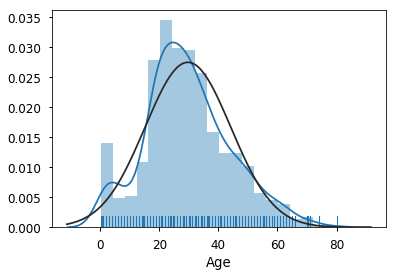

In [30]:
from scipy.stats import norm
with sns.plotting_context("notebook",font_scale=1.2):  #缩放字体
    f, ax = plt.subplots(1,1,figsize = (6,4))
    # sns.distplot(data_train['Age'],ax =ax[0])
    sns.distplot(data_train['Age'],rug = True, fit = norm,ax =ax)
    plt.show()

In [ ]:
# 怎么样让分布图 按照类别映射（hist ）

### 单因子变量 ==> 频数统计  countplot

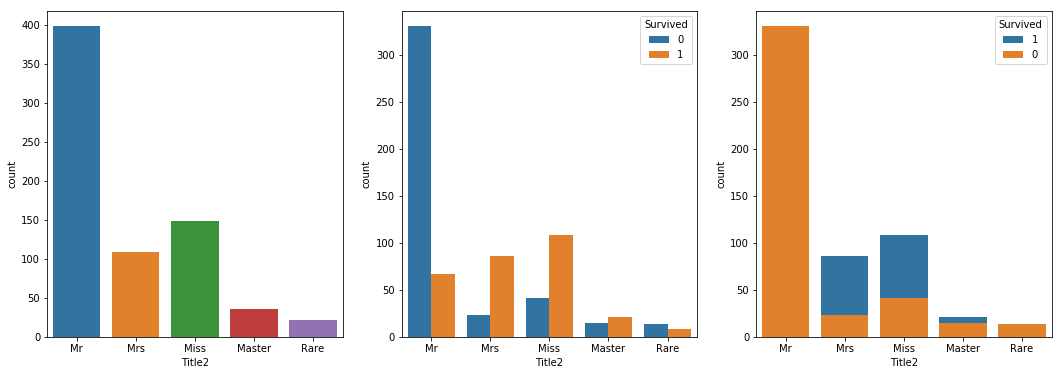

In [31]:
fig, ax = plt.subplots(1,3,figsize=(18,6))
sns.countplot(x='Title2', data= data_train,ax =ax[0])
# 映射 目标变量（是否存活）  存在问题 堆积情况下
sns.countplot(x='Title2',hue = 'Survived', data= data_train,ax =ax[1])

sns.countplot(x='Title2',hue = 'Survived', data= data_train,hue_order =[1,0],dodge = False,ax =ax[2])


####  按照因子变量映射
- factorplot()      -->  简单本 --factorplot
    + kind : { count,  | box, violin, strip |双变量 point, bar,  |}

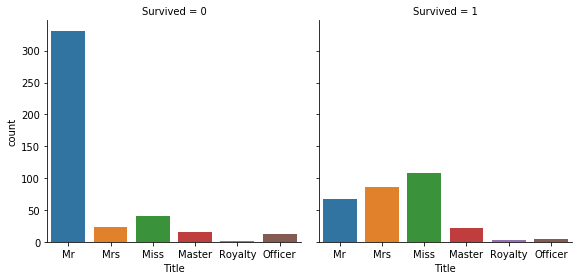

In [32]:
# 单变量 离散型  count (没有连续 分布图)  
sns.factorplot(x='Title', kind ='count',col = 'Survived',data =data_train)

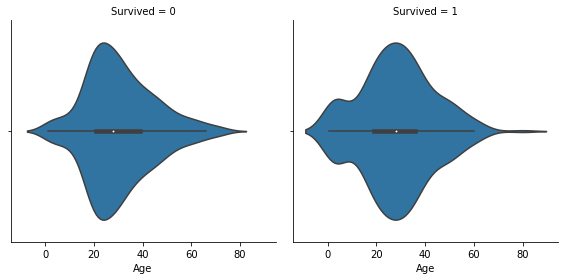

In [33]:
# 单变量 连续型   box, violin, strip
sns.factorplot(x='Age', kind ='violin',col = 'Survived',data =data_train)

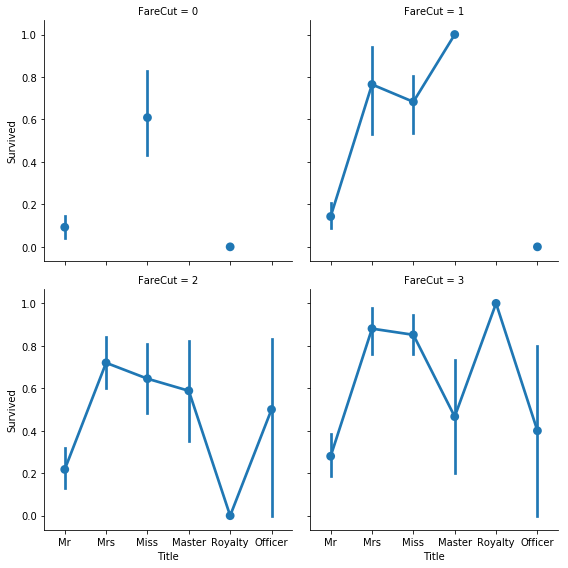

In [34]:
# point 图会给出置信度 ---波动区间    point要求因子变量是 数值型 
# 将目标变量作为y轴
sns.factorplot(x='Title',y='Survived', kind ='point',col = 'FareCut',data =data_train,col_wrap =2)

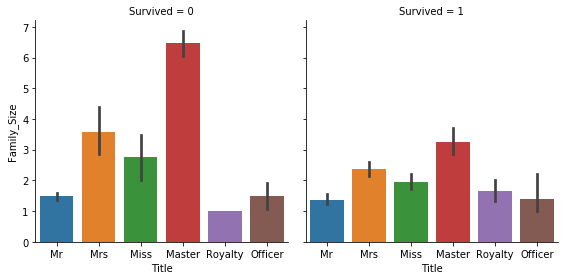

In [35]:
#纵轴 计算的连续变量的平均数（因子数值型）
sns.factorplot(x='Title',y='Family_Size', kind ='bar',col = 'Survived',data =data_train)

####  连续 变量散点图    lmplot(）
不能用factorplot()

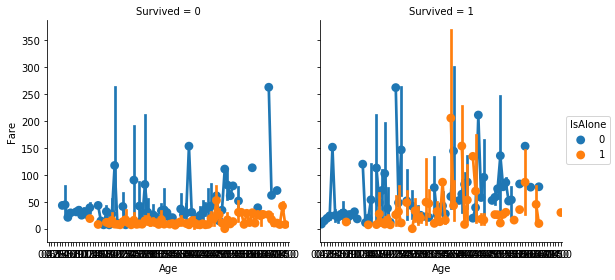

In [36]:
sns.factorplot(x='Age',y='Fare',hue="IsAlone", kind ='point',col = 'Survived',data =data_train,col_wrap =2)

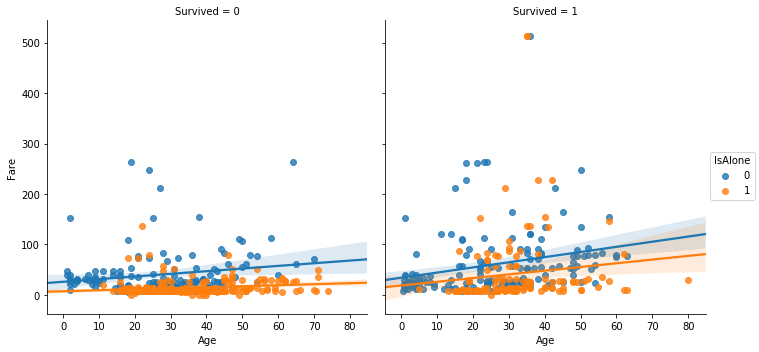

In [37]:
sns.lmplot(x='Age' ,y='Fare' ,hue="IsAlone",col ="Survived",data = data_train)

####  多变量相关图  PairGrid  
简便函数 pairplot

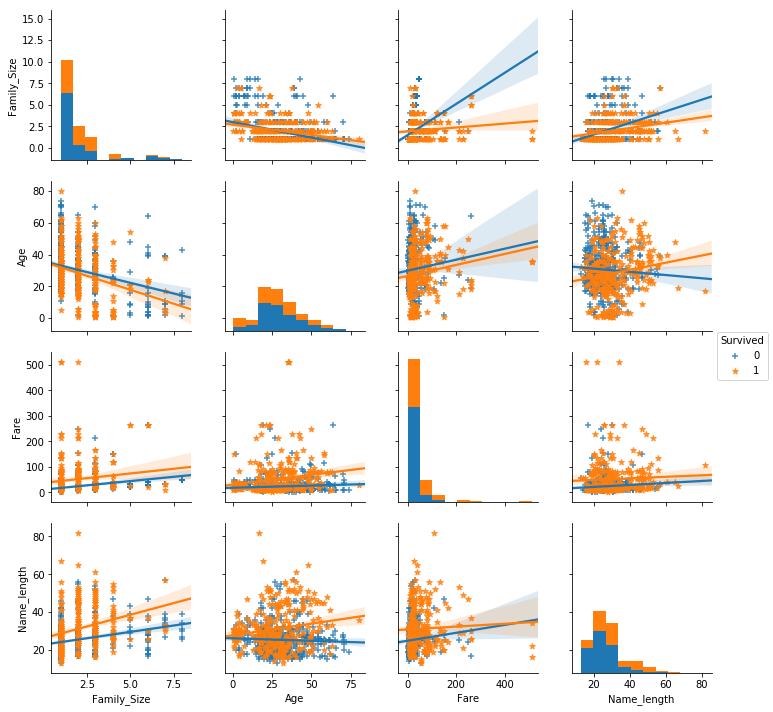

In [38]:
# columns =['Survived', 'Pclass', 'Sex', 'Age','Fare', 'Embarked', 'Age_cut',
#        'FareCut', 'Has_Cabin','Title2', 'Name_length', 'Family_Size', 'IsAlone',
#        'Fare_scale', 'Title_train']

plot_vars = ['Family_Size','Age','Fare','Name_length']

# kind : {‘scatter’, ‘reg’}

sns.pairplot(data = data_train,vars = plot_vars , hue = 'Survived',kind ='reg',markers=["+",'*'])


In [39]:
train = data_train[['Survived','Pclass','Sex','Age','Parch','Fare','Has_Cabin','Family_Size','IsAlone','Title_train']]

In [40]:
data_train.columns

Index(['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp',
       'Survived', 'date', 'rating', 'Initial', 'Name_length', 'Title',
       'Family_Size', 'Name_scaled', 'Title2', 'Title_train', 'W_Master',
       'Age_cut1', 'Age_band', 'CategoricalAge', 'FareCut', 'Fare_scale',
       'Sex_bool', 'Has_Cabin', 'IsAlone', 'Embarkedch', 'Title2ch'],
      dtype='object')

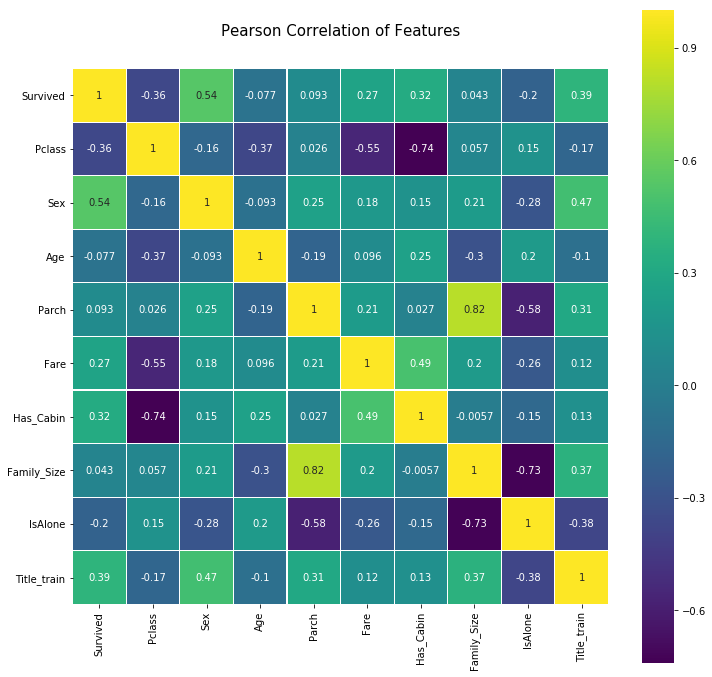

In [41]:
# titanic.corr()["Survived"]
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

##### 除以上的简单描述性统计之外，还提供了连续变量的相关系数（corr）和协方差矩阵（cov）的求解
df.corr()
关于相关系数的计算可以调用pearson方法或kendell方法或spearman方法，默认使用pearson方法。

df.corr('spearman')
如果只想关注某一个变量与其余变量的相关系数的话，可以使用corrwith,如下方只关心x1与其余变量的相关系数:

df.corrwith(df['x1'])
数值型变量间的协方差矩阵

df.cov()

In [42]:
# data_train.corr('kendall')   #相关系数pearson（默认）、spearman、kendall  
# data_train[['Age','Family_Size']].corrwith(data_train['Fare'])
# data_train.cov() #协方差矩阵

#### FacetGrid 通用 
Tidy (“long-form”) dataframe

可以map  不同的绘图函数（plt: scatter area hist  | sns: 的函数） 但是函数内部的参数设置？


In [43]:
def boo_plot(data,color):
    data.plot(kind ='scatter',x='Age',y='Fare',s=np.pi*(data_train['Family_Size']*3)**2,alpha =0.3,ax=plt.gca())
    

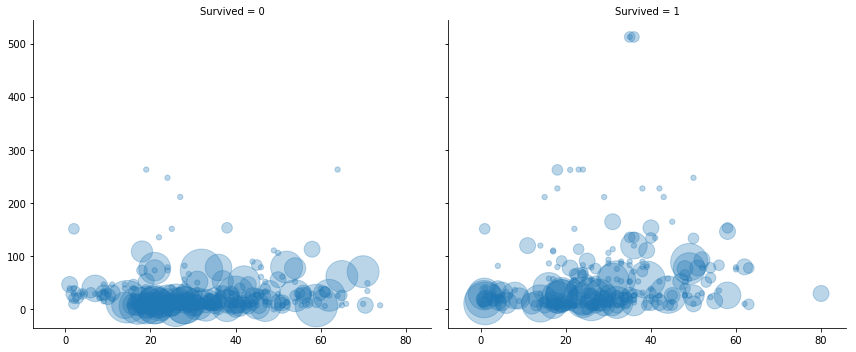

In [44]:
g= sns.FacetGrid(data=data_train,col='Survived',size= 5 ,aspect = 1.2)
g.map_dataframe(boo_plot)

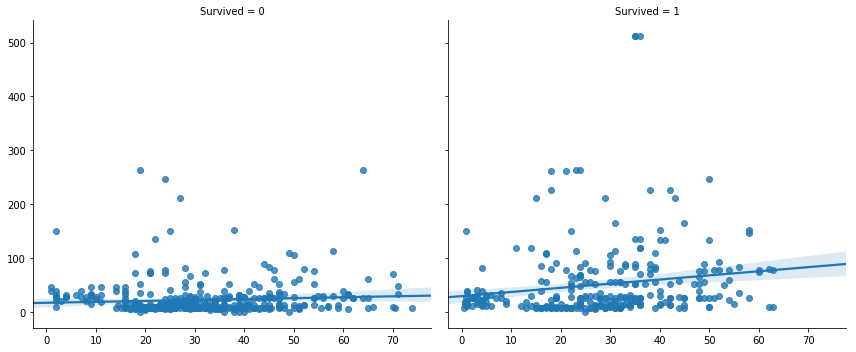

In [45]:
# 效果下相当于 直接使用 lmplot()
def def_plot(data,color):
    sns.regplot('Age','Fare',data,ax=plt.gca())
# 自定义的 jointplot()失败
    
g = sns.FacetGrid(data= data_train, col="Survived",size= 5 ,aspect = 1.2)  #   row="smoker"  
g = g.map_dataframe(def_plot)

# map_dataframe() Like map but passes args as strings and inserts data in kwargs.

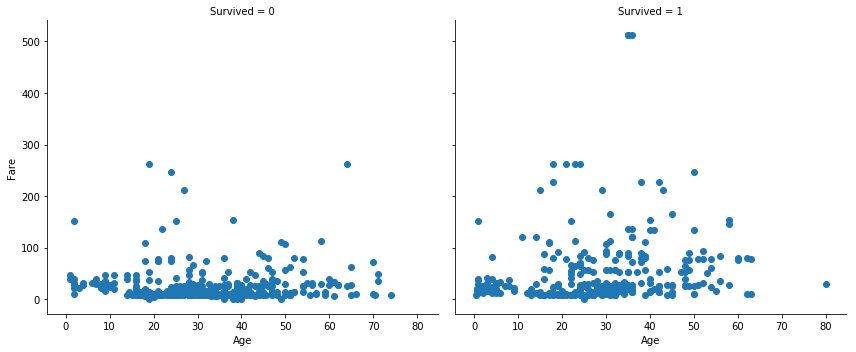

In [46]:
# 设置每个小图 图片尺寸 高：size  宽 ：aspect * size
g = sns.FacetGrid(data_train, col="Survived",size= 5 ,aspect = 1.2)  #   row="smoker"  
# g = g.map(sns.regplot, "Age","Fare")
g = g.map(plt.scatter, "Age","Fare")

#### 绘制年龄 和 票价的相关图

C:\ProgramData\Anaconda2\envs\gluon_py3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


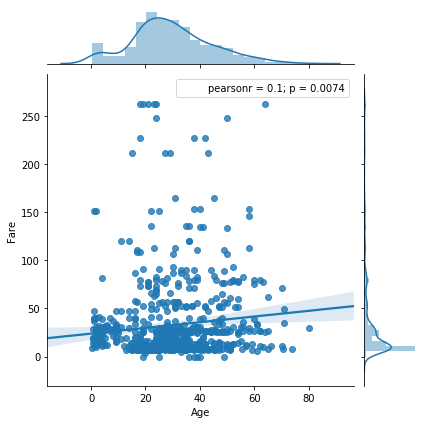

In [47]:
import seaborn as sns
# 体现相关性
# 两个连续变量的相关性 通过这个看
sns.jointplot('Age','Fare',data_train.loc[data_train['Fare']<=300],kind = 'reg')

C:\ProgramData\Anaconda2\envs\gluon_py3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


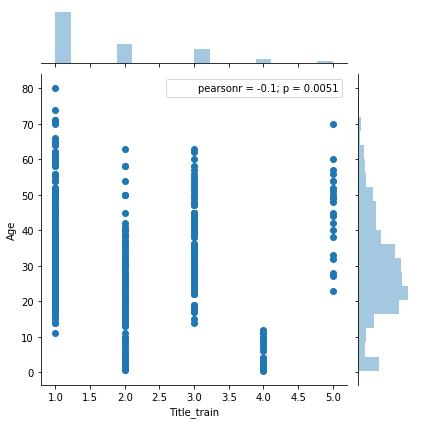

In [48]:
# 优：可以展示 两个变量的整体分布情况  
# 缺：但是看不到 因子内部的分布情况  不能映射第三个变量
sns.jointplot('Title_train','Age',data = data_train)

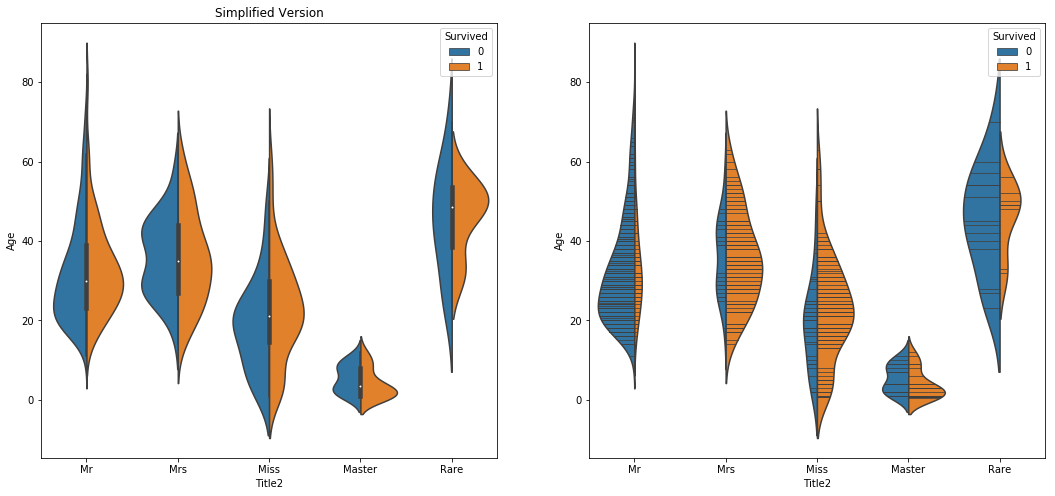

In [49]:
# 优：可以看不到 因子内部的分布情况   映射第三个变量
# 缺：但是不能展示 两个变量的整体分布情况 
f, ax = plt.subplots(1,2,figsize =(18,8))
sns.violinplot('Title2','Age',hue ='Survived',data = data_train, split =True, ax =ax[0])
ax[0].set_title("Simplified Version") # 标题不支持中文
sns.violinplot('Title2','Age',hue ='Survived',data = data_train, split =True,inner = 'stick',scale ='count', ax =ax[1])

plt.show()

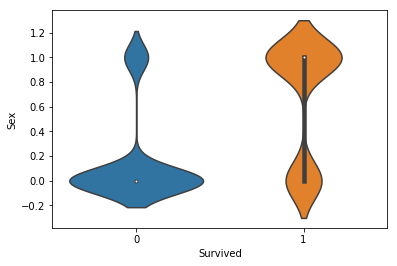

In [50]:
# data_train['Fare'].plot(kind ='box')

sns.violinplot(x= 'Survived',y = 'Sex',data = data_train, split =True)

#### 小提琴图 

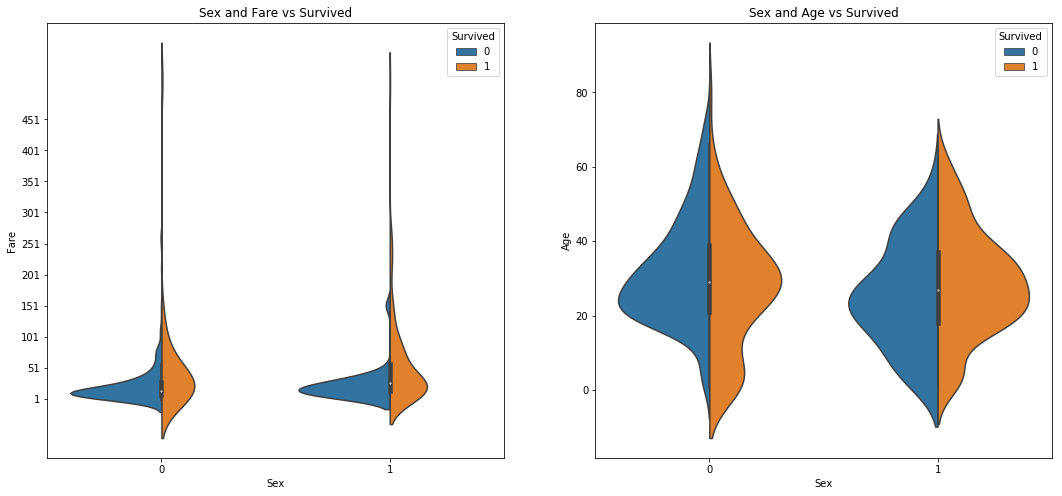

In [51]:
#因为Fare 有极端值  画的也不好看
f, ax = plt.subplots(1,2,figsize =(18,8))
sns.violinplot('Sex','Fare',hue = "Survived", data = data_train, split = True, ax = ax[0])
ax[0].set_title('Sex and Fare vs Survived')
ax[0].set_yticks(range(1,500,50))

sns.violinplot('Sex','Age', hue = "Survived", data = data_train, split = True, ax = ax[1])
ax[1].set_title('Sex and Age vs Survived')

plt.show()

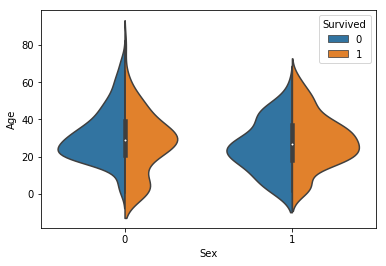

In [52]:
sns.violinplot("Sex","Age", hue="Survived", data=data_train,split=True)

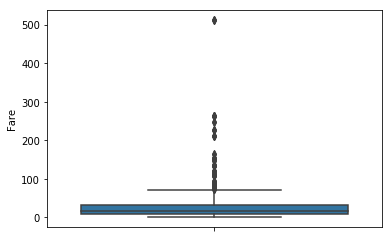

In [53]:
sns.boxplot(y = 'Fare',hue = 'Survived', data= data_train)